# Inicialização dataset - Task [001]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ftfy import fix_text
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [ ]:
# open the csv file with pandas and read it into a dataframe
df = pd.read_csv('../datasets/WineDataset.csv')
df2 = pd.read_csv('../datasets/XWines_Full_100K_wines.csv')
df3 = pd.read_csv('../datasets/merged_wine_dataset.csv')

In [ ]:
# print all the information about the dataframe
df.info()
df.describe()

In [ ]:
# print all the information about the dataframe
df2.info()
df2.describe()

In [ ]:
# print all the information about the dataframe
df3.info()
df3.describe()

In [ ]:
# fix text using ftfy
# fix all the columns except when the column is a float
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

# fix text using ftfy
# fix all the columns except when the column is a float
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

In [ ]:
# view all the unique values for each column except for the columns:'Title' 'Description', 'Country', 'Unit' 'Region' 'Appellation'
for col in df.columns:
    if col not in ['Title', 'Description', 'Country', 'Unit', 'Region', 'Appellation']:
        print(col, df[col].unique())

In [ ]:
for col in df3.columns:
    if col not in ['WineName', 'WineryName', 'Grape', 'Secondary Grape Varieties', 'Country', 'Region', 'Appellation', 'Style', 'Characteristics', 'Description']:
        print(col, df3[col].unique())

# Limpeza de dados
- Remoção de valores nulos
- Normalização de valores
- Remoção de colunas desnecessárias

In [ ]:
# Print wine where wineid 131027
print(df2.loc[df2['WineID'] == 131027])

#One-Hot Encoding for the column 'Type' 'Elaborate' 'Body', 'Acidity'

one_hot_encoded_df = pd.get_dummies(df2, columns=['Type','Body','Acidity','Elaborate'], prefix=['Type','Body','Acidity','Elaborate'])

# Binary Encoding for the column 'Country', 'RegionName', 'Grapes', 'Harmonize'

encoder = BinaryEncoder(cols=['Grapes', 'Harmonize'], return_df=True)
binary_encoded_df = encoder.fit_transform(df2)

encoded_df = pd.concat([one_hot_encoded_df, binary_encoded_df], axis=1)

# Normalize the 'ABV' column using MinMaxScaler
scaler = MinMaxScaler()

# Normalizing the 'ABV' column
encoded_df['ABV'] = scaler.fit_transform(encoded_df[['ABV']])


encoded_df = encoded_df.drop(columns=df2.columns)
encoded_df = encoded_df.dropna()

# Display the updated DataFrame
print(encoded_df)


### Classification Dataset Preprocessing - Task [066]
#### Normalizing Harmonize and grouping it into broader categories

In [ ]:
#Count how many grapes in the column grapes are unique grapes are in a array
grapes = df2['Grapes'].str.split(',').explode().unique()

#Remove every "]"" and "[" and "," and "'" and remove spaces if they are in the first character or the last character
grapes = [grape.replace(']', '').replace('[', '').replace(',', '').replace("'", '').strip() for grape in grapes]

grapes2 = ['Tempranillo', 'Chardonnay', 'Sauvignon Blanc', 'Pinot Noir', 'Glera', 'Chenin Blanc', 'Castelão ', 'Malagousia', 'Cinsault', 'Grenache', 'Shiraz', 'Cabernet Sauvignon', 'Bacchus', 'Viognier', 'Pinot Grigio', 'Garnacha', 'Malbec', 'Cortese', 'Merlot', 'Melon De Bourgogne', 'Carménère', 'Zinfandel', 'Syrah', 'Marsanne', 'Gruner Veltliner', 'Corvina', 'Greco', 'Macabeo', 'Gamay', 'Loureiro', 'Riesling', 'Alvarinho', 'Mourvèdre', 'Cabernet Franc', 'Vespaiola', 'Picpoul', 'Vermentino', 'Sangiovese', 'Pinot Meunier', 'Verdejo', 'Primitivo', 'Pinotage', 'Alicante Bouschet', 'Garganega', 'Godello', 'Carignan', 'Grenache Blanc', 'Aligoté', 'Siegerrebe', 'Touriga Nacional', 'Albarino', 'Nerello Mascalese', "Nero D'Avola", 'Turbiana', 'Pinot Gris', 'Airen', 'Trincadeira', 'Tinta Roriz', 'Xinomavro', 'Agiorgitiko', 'Pais', 'Gewürztraminer', 'Mencia', 'Verdicchio', 'Fiano', 'Rondinella', 'Mauzac', 'Nebbiolo', 'Lambrusco Grasparossa', 'Pecorino', 'Negroamaro', 'Fernão Pires', 'Feteasca Alba', 'Zwieigelt', 'Grillo', 'Tinta Barroca', 'Furmint', 'Touriga Franca', 'Pedro Ximénez', 'Palomino', 'Viura', 'Montepulciano', 'Barbera', 'Malvasia', 'Arinto', 'Colombard', 'Sémillon', 'Jacquere', 'Pinot Blanc', 'Rkatsiteli', 'Syrah-Shiraz', 'Torrontes', 'Sauvignon Gris', 'Assyrtiko', 'Moscato', 'Rolle', 'Huxelrebe', 'Xarel-Lo', 'Niellucciu', 'Saperavi', 'Rara Neagra', 'Non Varietal', 'Muscat', 'Monastrell', 'Dolcetto', 'Black Muscat', 'Nerello', 'Roussanne', 'Tibouren', 'Grolleau', 'Inzolia', 'Falanghina', 'Aglianico']

# Create a new array of grapes where both of the grapes match
grapes = list(set(grapes) & set(grapes2))
print(grapes)

df2['Grapes'] = df2['Grapes'].apply(lambda x: ast.literal_eval(x))

df2['Grapes'] = df2['Grapes'].apply(
    lambda x: [grape for grape in x if grape in grapes]
)

# Drop rows where the resulting 'Grapes' column is empty
df2 = df2[df2['Grapes'].str.len() > 0]

df2['Grapes'] = df2['Grapes'].apply(
    lambda x: x[0]
)

# Replace dishes with their broader categories in the Harmonize column
df2['Harmonize'] = df2['Harmonize'].apply(eval)
dish_to_category = {
    'Beef': 'Meat', 'Lamb': 'Meat', 'Pork': 'Meat', 'Veal': 'Meat', 'Game Meat': 'Meat',
    'Duck': 'Meat', 'Ham': 'Meat', 'Cold Cuts': 'Meat', 'Cured Meat': 'Meat',
    'Poultry': 'Poultry', 'Chicken': 'Poultry',
    'Rich Fish': 'Fish & Seafood', 'Lean Fish': 'Fish & Seafood', 'Shellfish': 'Fish & Seafood',
    'Seafood': 'Fish & Seafood', 'Sushi': 'Fish & Seafood', 'Sashimi': 'Fish & Seafood',
    'Codfish': 'Fish & Seafood', 'Fish': 'Fish & Seafood', 'Grilled': 'Fish & Seafood',
    'Soft Cheese': 'Cheese', 'Hard Cheese': 'Cheese', 'Blue Cheese': 'Cheese',
    'Maturated Cheese': 'Cheese', 'Goat Cheese': 'Cheese', 'Mild Cheese': 'Cheese',
    'Medium-cured Cheese': 'Cheese', 'Cheese': 'Cheese',
    'Pasta': 'Pasta', 'Tagliatelle': 'Pasta', 'Lasagna': 'Pasta',
    'Paella': 'Fish & Seafood', 'Pizza' : 'Pasta',
    'Vegetarian': 'Vegetarian & Vegan', 'Mushrooms': 'Vegetarian & Vegan', 'Salad': 'Vegetarian & Vegan',
    'Fruit': 'Vegetarian & Vegan', 'Tomato Dishes': 'Vegetarian & Vegan', 'Beans': 'Vegetarian & Vegan',
    'Eggplant Parmigiana': 'Vegetarian & Vegan', 'Light Stews': 'Vegetarian & Vegan',
    'Appetizer': 'Appetizers & Snacks', 'Snack': 'Appetizers & Snacks',
    'Aperitif': 'Appetizers & Snacks', 'French Fries': 'Appetizers & Snacks', 'Baked Potato': 'Appetizers & Snacks',
    'Cream': 'Appetizers & Snacks',
    'Sweet Dessert': 'Desserts', 'Fruit Dessert': 'Desserts', 'Citric Dessert': 'Desserts',
    'Cake': 'Desserts', 'Chocolate': 'Desserts', 'Cookies': 'Desserts',
    'Chestnut': 'Desserts', 'Spiced Fruit Cake': 'Desserts', 'Dessert': 'Desserts',
    'Soufflé': 'Desserts', 'Dried Fruits': 'Desserts',
    'Spicy Food': 'Spicy Food', 'Curry Chicken': 'Spicy Food', 'Asian Food': 'Spicy Food', 'Yakissoba': 'Spicy Food',
    'Barbecue': 'Meat', 'Roast': 'Meat'
}

columns = df2.columns
new_harmonize = df2.copy()
new_harmonize['Harmonize'] = df2['Harmonize'].apply(lambda x: list(set(dish_to_category.get(dish, dish) for dish in x)))

# Expand the Harmonize column into multiple rows, one for each dish
new_harmonize = new_harmonize.explode('Harmonize')

# Reset the index for consistency and remove any rows with 'Risotto' because it has a number of insignificant occurrences
new_harmonize.reset_index(drop=True, inplace=True)
new_harmonize = new_harmonize[new_harmonize['Harmonize'].apply(lambda x: 'Risotto' not in x)]
df2 = new_harmonize.copy()

# Get the unique dishes
unique_categories = df2['Harmonize'].unique()

# One-hot encoding
for dish in unique_categories:
    new_harmonize[f'Harmonize_{dish}'] = new_harmonize['Harmonize'].apply(lambda x: x == dish)
# Turn new_harmonize into a harmonize dataframe
new_harmonize = new_harmonize.drop(columns=columns)

### Normalizing the rest of the columns

In [ ]:
#One-Hot Encoding for the column 'Type' 'Elaborate' 'Body', 'Acidity', 'Grapes'
one_hot_encoded_df = pd.get_dummies(df2, columns=['Type', 'Elaborate', 'Body', 'Acidity', 'Grapes'])

encoded_df = one_hot_encoded_df.copy()

# Maximum ABV value
print(encoded_df['ABV'].min())
print(encoded_df['ABV'].max())

# Normalizing the 'ABV' column
scaler = MinMaxScaler()
encoded_df['ABV'] = scaler.fit_transform(encoded_df[['ABV']])

# Dropping unnecessary columns
encoded_df = encoded_df.drop(columns=['Country', 'RegionName', 'Code', 'WineName', 'WineID', 'Vintages', 'Website', 'WineryID', 'WineryName', 'RegionID','Harmonize'])
encoded_df = encoded_df.dropna()
print(encoded_df.columns)
# add new_harmonize to the encoded_df
encoded_df = pd.concat([encoded_df, new_harmonize], axis=1)

### Boxplot

In [ ]:
# Calculate the IQR
numeric_df = encoded_df['ABV']
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)
iqr = q3 - q1

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=numeric_df, showmeans=True, orient="h")

Analyzing the resulting boxplot, we observe that some values fall outside the ranges but are still relevant, as 0% alcohol wines, including dealcoholized varieties, remain within the wine category. These options retain the essence of traditional wines without alcohol. Additionally, beverages like firewater, with higher alcohol content, can also bring value to the project.

### Correlation Matrix

In [ ]:
# Compute the correlation matrix without the Elaborate columns to reduce the size of the heatmap
drop_columns = encoded_df.columns[encoded_df.columns.str.startswith('Elaborate_')]
drop_columns = drop_columns.append(encoded_df.columns[encoded_df.columns.str.startswith('Grapes_')])
matrix_df = encoded_df.drop(columns=drop_columns)
correlation_matrix = matrix_df.corr()


plt.figure(figsize=(20, 15))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    annot_kws={"size": 10}
)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

Analyzing the matrix, we observe that it is relatively ‘cold,’ meaning it exhibits a low correlation index overall. Despite the generally low correlations between features, certain specific relationships do stand out. For instance, some dishes in the ‘Harmonize’ category show a notable correlation with particular wines, while certain body characteristics correlate with the alcohol by volume (ABV) and wine types.

### PCA

In [ ]:
from sklearn.decomposition import PCA

harmonize_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]

# Loop through each 'harmonize_' column and perform PCA
for label_col in harmonize_columns:
    print(f"Generating PCA plot for label column: {label_col}")

    features = encoded_df.drop(columns=[label_col])
    labels = encoded_df[label_col].values

    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(features)

    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(
            df_pca[labels == label, 0],
            df_pca[labels == label, 1],
            label=f'Classe {label}'
        )

    plt.title(f'PCA - Column: {label_col}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.grid()
    plt.show()

When applying PCA to identify patterns and relationships among the different categories in the ‘Harmonize’ column, we encountered inconclusive results. The resulting plots showed the various categories exhibiting similar patterns, with data points widely scattered across the graphical space rather than concentrated in specific zones.

### Neural Network

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Step 1: Assume the data (encoded_df) is preprocessed externally
# Ensure relevant columns are present in encoded_df
columns_needed = [
    'ABV', 'Harmonize_Meat', 'Harmonize_Poultry', 'Harmonize_Cheese', 'Harmonize_Spicy Food',
    'Harmonize_Appetizers & Snacks', 'Harmonize_Fish & Seafood', 'Harmonize_Vegetarian & Vegan',
    'Harmonize_Desserts', 'Harmonize_Pasta'
]  # Add other relevant columns as needed
assert all(col in encoded_df.columns for col in columns_needed), "Required columns are missing from encoded_df"

# Ensure encoded_df is a DataFrame
if isinstance(encoded_df, np.ndarray):
    encoded_df = pd.DataFrame(encoded_df, columns=columns_needed)

# Ensure all columns are numeric
for col in encoded_df.columns:
    encoded_df[col] = pd.to_numeric(encoded_df[col], errors='coerce').fillna(0)

harmonize_mapping = {i: col.replace("Harmonize_", "") for i, col in enumerate(harmonize_columns)}
harmonize_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]
# Step 2: Feature and Target Preparation
type_columns = [col for col in encoded_df.columns if col.startswith('Type_')]
grape_columns = [col for col in encoded_df.columns if col.startswith('Grapes_')]

features = encoded_df.drop(columns=harmonize_columns)  # Features exclude harmonize columns
labels = encoded_df[harmonize_columns]  # Targets are harmonize columns

**The training model**

In [ ]:
# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 2: Neural Network Setup
model = Sequential([
    Dense(units=y_train.shape[1], input_dim=X_train.shape[1], activation='softmax')  # Single-layer with softmax
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 4: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 5: Visualize Training Progress
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

With Hyperameter tunning

Tuning for Adam optimizer:
Training with optimizer=Adam, batch_size=32, epochs=10
Accuracy: 34.75%
Training with optimizer=Adam, batch_size=32, epochs=20
Accuracy: 34.40%
Best Hyperparameters for Optimizer:
Optimizer: Adam
Batch Size: 32
Epochs: 10
Best Accuracy: 34.75%


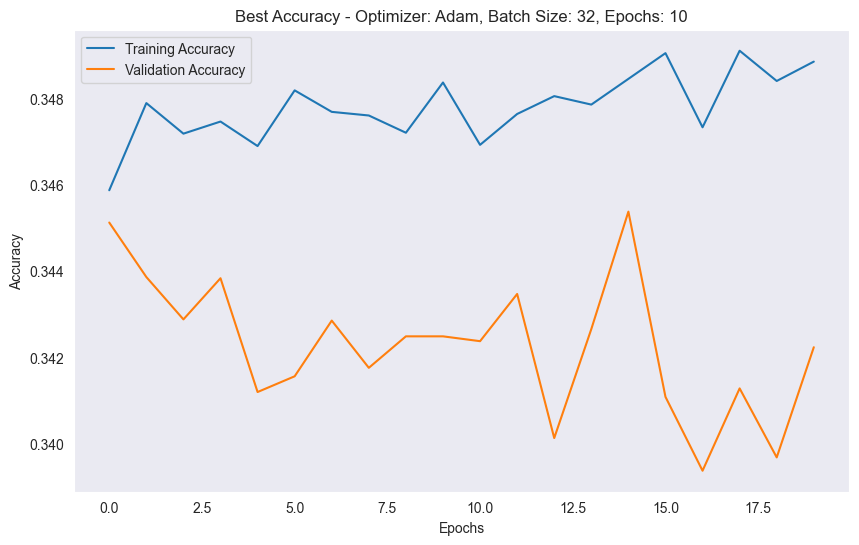

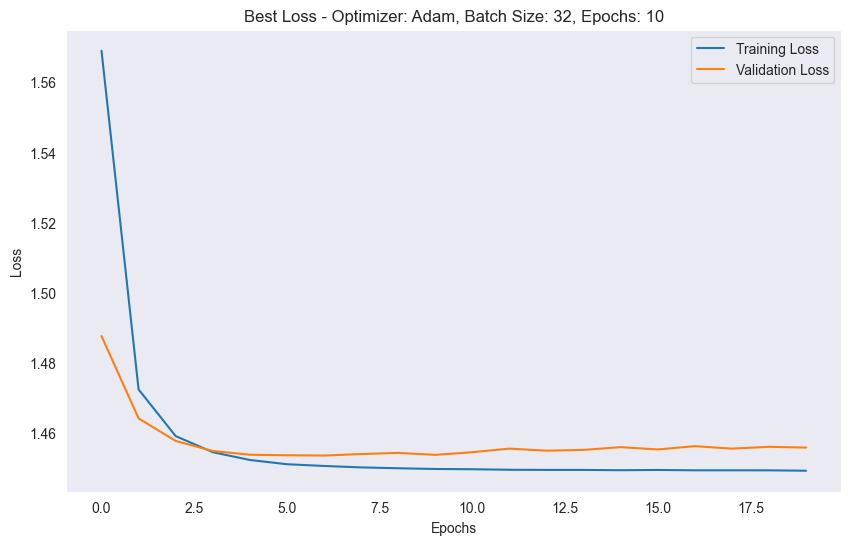

Tuning for SGD optimizer:
Training with optimizer=SGD, batch_size=32, epochs=10
Accuracy: 34.56%
Training with optimizer=SGD, batch_size=32, epochs=20
Accuracy: 34.81%
Best Hyperparameters for Optimizer:
Optimizer: SGD
Batch Size: 32
Epochs: 20
Best Accuracy: 34.81%


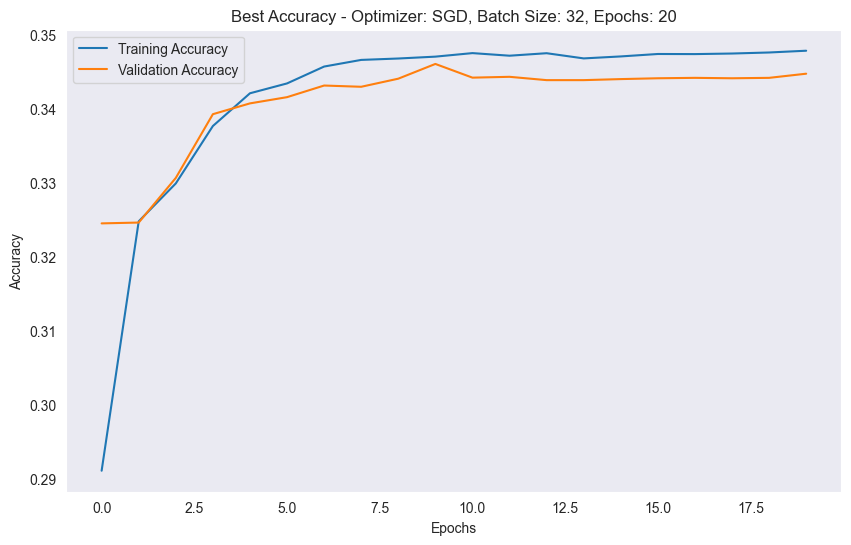

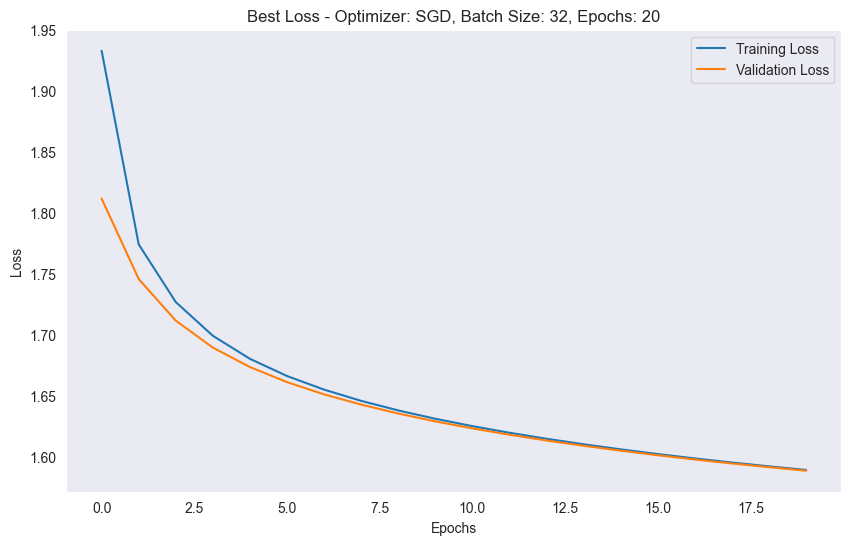

Tuning for RMSprop optimizer:
Training with optimizer=RMSprop, batch_size=32, epochs=10
Accuracy: 34.58%
Training with optimizer=RMSprop, batch_size=32, epochs=20
Accuracy: 34.61%
Best Hyperparameters for Optimizer:
Optimizer: RMSprop
Batch Size: 32
Epochs: 20
Best Accuracy: 34.61%


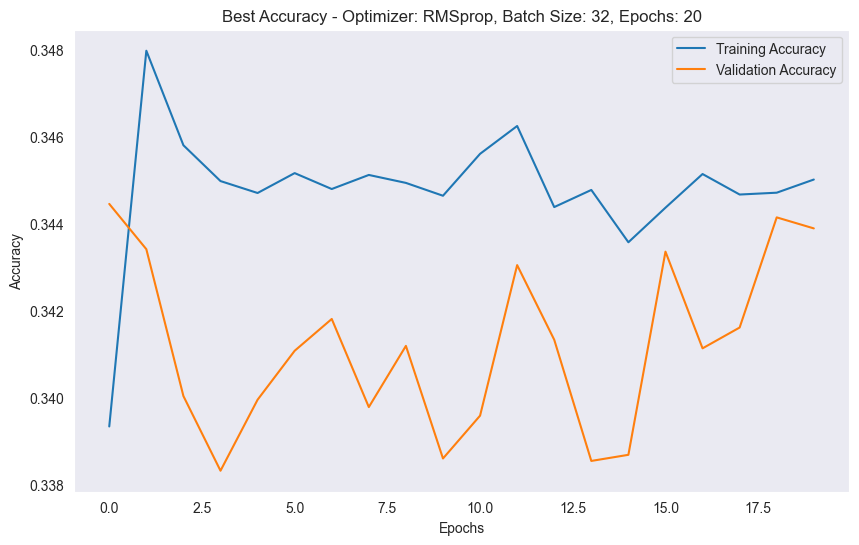

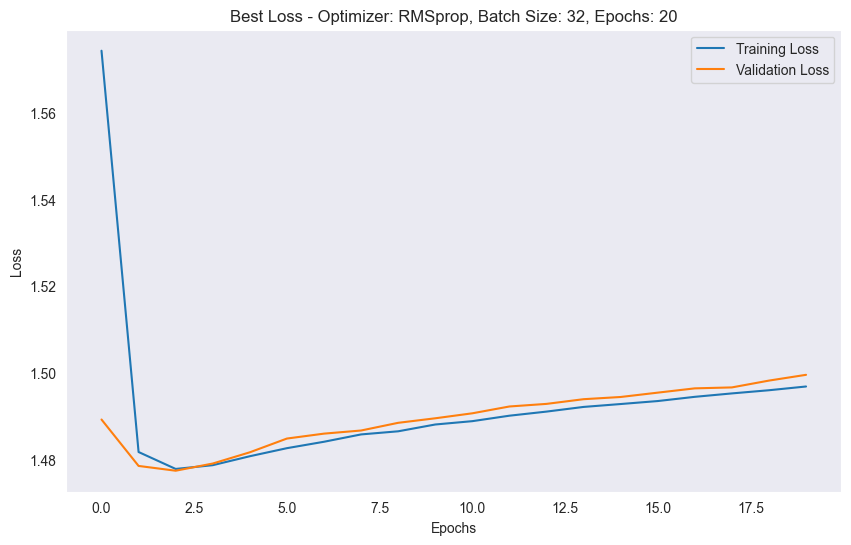

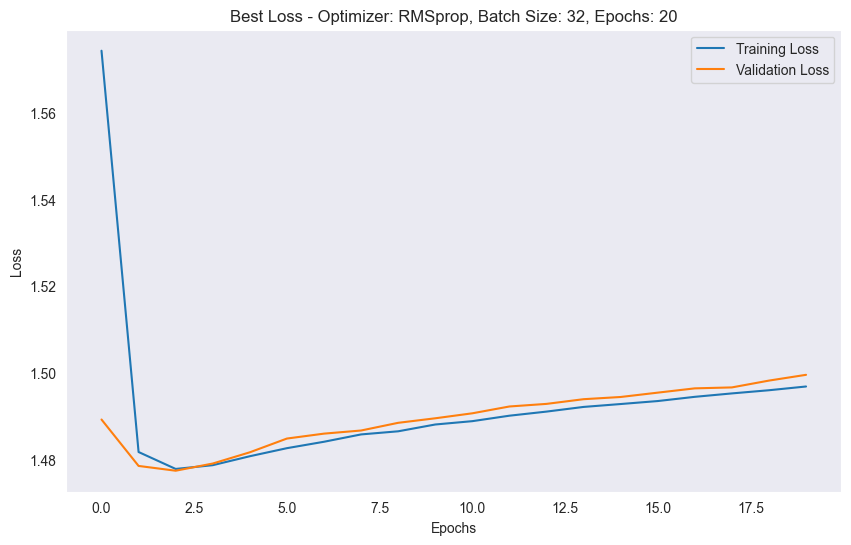

In [164]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.backend import clear_session

# Enable eager execution to ensure compatibility with numpy() calls
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

def build_and_train_model(optimizer, batch_size, epochs):
    clear_session()  # Clear backend session to reset model state
    model = Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Define input shape explicitly
        Dense(units=y_train.shape[1], activation='softmax')  # Single-layer with softmax
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Return accuracy and training history for later visualization
    return accuracy * 100, history

# Hyperparameter grid
batch_sizes = [32]
epochs_list = [10, 20]

def tune_optimizer(optimizer_class):
    global best_accuracy, best_params, history
    best_accuracy = 0
    best_params = {}

    for batch_size in batch_sizes:
        for epochs in epochs_list:
            optimizer = optimizer_class(learning_rate=0.001)  # Create a new optimizer instance
            print(f"Training with optimizer={optimizer.__class__.__name__}, batch_size={batch_size}, epochs={epochs}")
            accuracy, history = build_and_train_model(optimizer, batch_size, epochs)
            print(f"Accuracy: {accuracy:.2f}%")
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'optimizer': optimizer.__class__.__name__,
                    'batch_size': batch_size,
                    'epochs': epochs
                }

    print("Best Hyperparameters for Optimizer:")
    print(f"Optimizer: {best_params['optimizer']}")
    print(f"Batch Size: {best_params['batch_size']}")
    print(f"Epochs: {best_params['epochs']}")
    print(f"Best Accuracy: {best_accuracy:.2f}%")

    # Visualize training progress for the best combination
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Best Accuracy - Optimizer: {best_params["optimizer"]}, Batch Size: {best_params["batch_size"]}, Epochs: {best_params["epochs"]}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Best Loss - Optimizer: {best_params["optimizer"]}, Batch Size: {best_params["batch_size"]}, Epochs: {best_params["epochs"]}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()


print("Tuning for Adam optimizer:")
tune_optimizer(Adam)

print("Tuning for SGD optimizer:")
tune_optimizer(SGD)

print("Tuning for RMSprop optimizer:")
tune_optimizer(RMSprop)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Best Loss - Optimizer: {best_params["optimizer"]}, Batch Size: {best_params["batch_size"]}, Epochs: {best_params["epochs"]}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


#### Classification Model Evaluation

**Predictions as classification for a single meal**

In [165]:
def predict_best_wine_and_grape(harmonize_label, data_frame, neural_model):
    harmonize_col = f"Harmonize_{harmonize_label}"
    if harmonize_col not in encoded_df.columns:
        return {"Error": f"Harmonize label '{harmonize_label}' not found in dataset."}

    # Create an input vector for the given harmonize label
    input_vector = data_frame.iloc[0].copy()  # Use a template row
    input_vector[:] = 0  # Set all values to zero
    input_vector[harmonize_col] = 1  # Set the given harmonize column to 1

    # Ensure numerical features like 'ABV' have a reasonable default
    if 'ABV' in input_vector.index:
        input_vector['ABV'] = 0.5  # Use a normalized midpoint value for ABV

    # Drop harmonize columns to match the model's input features
    input_vector = input_vector.drop(harmonize_columns)
    input_vector = input_vector.values.astype(float).reshape(1, -1)  # Reshape for prediction

    # Predict using the trained model
    prediction = neural_model.predict(input_vector)
    predicted_class = np.argmax(prediction)
    predicted_harmonize = harmonize_mapping[predicted_class]

    # Find the best wine type and grape based on the predicted harmonize label
    matching_rows_df = data_frame[data_frame[harmonize_col] == 1]
    best_wine_type = matching_rows_df[type_columns].mean().idxmax().replace("Type_", "")
    best_grape = matching_rows_df[grape_columns].mean().idxmax().replace("Grapes_", "")

    return {"Harmonize": predicted_harmonize, "Wine Type": best_wine_type, "Grape": best_grape}

# Example usage
harmonize_label = "Meat"  # Replace with the desired harmonize label
result = predict_best_wine_and_grape(harmonize_label, encoded_df, model)
print(f"Prediction for Harmonize '{harmonize_label}':")
print(f"Best Wine Type: {result['Wine Type']}")
print(f"Best Grape: {result['Grape']}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction for Harmonize 'Meat':
Best Wine Type: Red
Best Grape: Cabernet Sauvignon


Predictions for the Entire Test Data

In [ ]:
# Predictions for the Entire Test Data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
y_true_classes = np.argmax(y_test.values, axis=1)

# Restore Harmonize mapping
harmonize_mapping = {col: col.replace("Harmonize_", "") for col in harmonize_columns}
predicted_harmonize_labels = [harmonize_mapping[harmonize_columns[pred]] for pred in predicted_classes]

# Map predictions back to wines and grapes (simplified for available columns)
results = []
for harmonize_label in predicted_harmonize_labels:
    matching_rows = encoded_df[encoded_df[f'Harmonize_{harmonize_label}'] == 1]
    wines = matching_rows.index.tolist()  # Assuming wines are represented by row indices or other identifiers
    grapes = matching_rows.filter(like='Grapes_').idxmax(axis=1).tolist()  # Get most likely grape columns
    results.append({"Harmonize": harmonize_label, "Wines": wines, "Grapes": grapes})

# Print results for each test sample
for i, result in enumerate(results):
    print(f"Test Sample {i + 1}:")
    print(f"Harmonize: {result['Harmonize']}")
    print(f"Wines: {result['Wines']}")
    print(f"Grapes: {result['Grapes']}")
    print("-" * 40)

#### Measures

ROC Curve: Plots true positive rate vs. false positive rate.
AUC: Measures the ability of the model to distinguish between classes.

1392/1392 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step


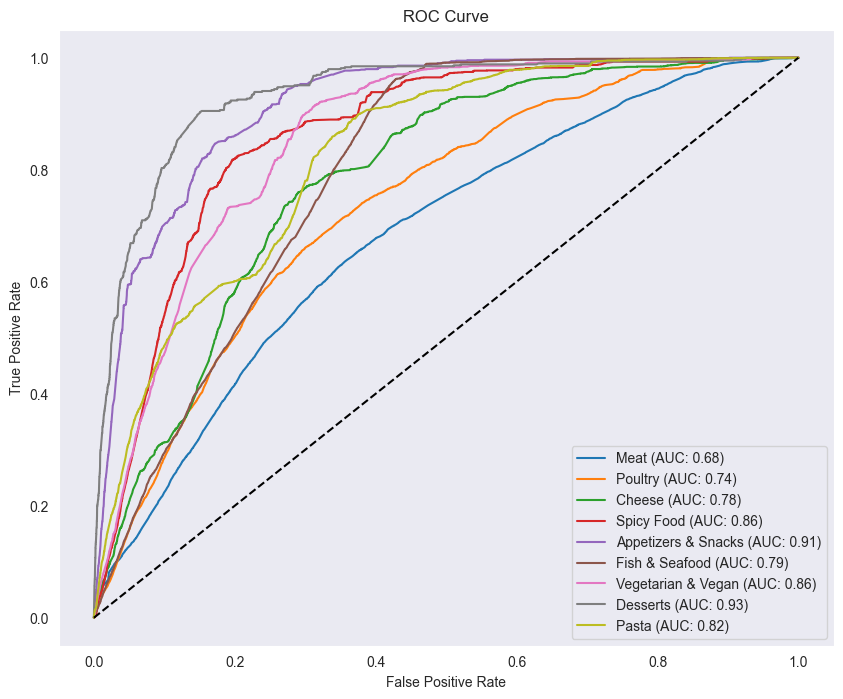

In [166]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC-AUC for each valid class
predictions = model.predict(X_test)
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(list(harmonize_mapping.values())):
    # Check if the class has more than one unique value
    if len(np.unique(y_test.values[:, i])) > 1:
        fpr, tpr, _ = roc_curve(y_test.values[:, i], predictions[:, i])
        auc_score = roc_auc_score(y_test.values[:, i], predictions[:, i])
        plt.plot(fpr, tpr, label=f'{class_name} (AUC: {auc_score:.2f})')
    else:
        print(f"Skipping ROC-AUC for class '{class_name}' due to lack of variation in y_test.")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Confusion Matrix
Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, predicted_classes)

# Extract the actual class labels
unique_labels = sorted(np.unique(np.concatenate((y_true_classes, predicted_classes))))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[harmonize_mapping[i] for i in unique_labels])
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()




In [167]:
from scipy.stats import binomtest

# Compare model accuracy to random guessing (baseline)
random_accuracy = 1 / len(harmonize_columns)  # Assume equal probability for each class
correct_predictions = np.sum(predicted_classes == y_true_classes)
total_predictions = len(y_true_classes)

# Perform binomial test
binom_test_result = binomtest(correct_predictions, total_predictions, random_accuracy)
p_value = binom_test_result.pvalue

print(f"Model Accuracy: {correct_predictions / total_predictions:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Model predictions are significantly better than random guessing.")
else:
    print("Model predictions are not significantly better than random guessing.")



Model Accuracy: 0.3457, P-Value: 0.0000
Model predictions are significantly better than random guessing.
